In [1]:
import numpy as np
import pandas as pd

### Light Curve Data ###
Author: Mimmo (Domenico Nardiello)

**Headers explanation:**

- col 1: TIME[d]: BTJD (BJD-2457000.0)
- col 2: TIMECORR[d]: Barycentric correction already applied to the col 1, anyway in this case is zero
- col 3: PSF_FLUX_RAW[e-/s] PSF-fitting RAW photometry flux
- col 4: PSF_FLUX_COR[e-/s] col 3, CORRECTED for CBV
- col 5: AP1_FLUX_RAW[e-/s] 1-px aperture photometry RAW flux
- col 6: AP1_FLUX_COR[e-/s] 1-px aperture photometry CORRECTED flux
- ... so on for col 7-12 for 2-px, 3-px, 4-px aperture photometry
- col 13: SKY_LOCAL[e-/s] Local sky background
- col 14, 15: X_POSITION[pixel] / Y_POSITION[pixel] The X/Y positions on the CCD
- col 16: DQUALITY flag. Ggood points have DQUALITY==0

**Light-curve cleaning:**

- Exclude DQUALITY>0.
- Background cut: 
    - excluding all the points with sky>mean_sky+4sigma
    - and all the points with sky>200 or 250 e/s (Depends on how faint is the star... maybe in this case it's better 200 as threshold)

(Text(0.5, 0, 'Time (BTJD) (d)'),
 Text(0, 0.5, 'Normalized Flux'),
 <matplotlib.legend.Legend at 0x7fceab851790>)

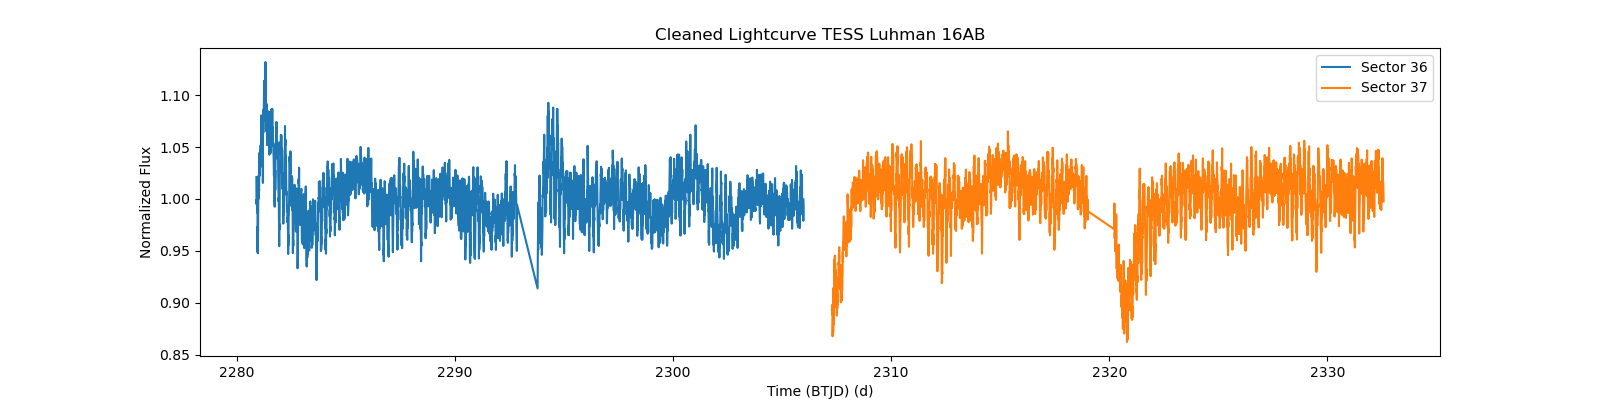

In [23]:
## SECTOR 36 Light Curve
lc36_path = "~/Documents/AROMA_CloudMapping/AROMA_An_Exo_Rot_Mapping/data/raw/luhman16_extended_mission/hlsp_pathos_tess_lightcurve_tic-0936441397-s036_tess_v1_llc.txt"

## SECTOR 37 Light Curve
lc37_path = "~/Documents/AROMA_CloudMapping/AROMA_An_Exo_Rot_Mapping/data/raw/luhman16_extended_mission/hlsp_pathos_tess_lightcurve_tic-0936441397-s037_tess_v1_llc.txt"

headerstring = "TIME TIMECORR PSF_FLUX_RAW PSF_FLUX_COR AP1_FLUX_RAW AP1_FLUX_COR AP2_FLUX_RAW AP2_FLUX_COR AP3_FLUX_RAW AP3_FLUX_COR AP4_FLUX_RAW AP4_FLUX_COR SKY_LOCAL X_POSITION Y_POSITION DQUALITY"
headers = headerstring.split()

lc36_data_raw = pd.read_csv(lc36_path, names=headers, skiprows=26, sep='\s+')
lc37_data_raw = pd.read_csv(lc37_path, names=headers, skiprows=26, sep='\s+')


# Light curve cleaning
sky36_threshold = lc36_data_raw.SKY_LOCAL.mean() + 4*lc36_data_raw.SKY_LOCAL.std()
sky36_noise = 250 #(e s^-1)
lc36_data = lc36_data_raw.query("DQUALITY == 0 & PSF_FLUX_COR>%f & PSF_FLUX_COR<=%f"%(sky36_noise, sky36_threshold))


# sky37_threshold = lc37_data_raw.SKY_LOCAL.mean() + 4*lc37_data_raw.SKY_LOCAL.std()
sky37_noise = 200 #(e s^-1)
lc37_data = lc37_data_raw.query("DQUALITY == 0 & PSF_FLUX_COR>%f & PSF_FLUX_COR<=%f"%(sky36_noise, sky36_threshold))
# use sky threshold of sector 36

%matplotlib widget
import matplotlib.pyplot as plt

# plt.figure(), plt.title('Raw Lightcurve')
# plt.plot(lc36_data_raw.TIME, lc36_data_raw.PSF_FLUX_COR)
plt.figure(figsize=(16, 4)), plt.title('Cleaned Lightcurve TESS Luhman 16AB')
plt.plot(lc36_data.TIME, lc36_data.PSF_FLUX_COR/lc36_data.PSF_FLUX_COR.mean(), label="Sector 36")
plt.plot(lc37_data.TIME, lc37_data.PSF_FLUX_COR/lc37_data.PSF_FLUX_COR.mean(), label="Sector 37")
plt.xlabel('Time (BTJD) (d)'), plt.ylabel('Normalized Flux'), plt.legend()

In [29]:
# Data write out
import warnings
warnings.filterwarnings('ignore')

outpath = "/Users/fuda/Documents/AROMA_CloudMapping/AROMA_An_Exo_Rot_Mapping/data/processed/"
lc_out_path = "luhman_16ab_sector36-37.txt"

lc36_data['PSF_MEAN'] = lc36_data.PSF_FLUX_COR.mean()
lc37_data['PSF_MEAN'] = lc37_data.PSF_FLUX_COR.mean()
lc36_data['AP1_MEAN'] = lc36_data.AP1_FLUX_COR.mean()
lc37_data['AP1_MEAN'] = lc37_data.AP1_FLUX_COR.mean()
frames = [lc36_data[['TIME', 'PSF_FLUX_RAW', 'PSF_MEAN', 'PSF_FLUX_COR', 'AP1_FLUX_COR', 'AP1_MEAN', 'SKY_LOCAL', 'X_POSITION', 'Y_POSITION']],
          lc37_data[['TIME', 'PSF_FLUX_RAW', 'PSF_MEAN','PSF_FLUX_COR', 'AP1_FLUX_COR', 'AP1_MEAN', 'SKY_LOCAL', 'X_POSITION', 'Y_POSITION']]]
lc3637 = pd.concat(frames)
lc3637.to_csv

In [30]:
lc3637

TIME  PSF_FLUX_RAW    PSF_MEAN  PSF_FLUX_COR  AP1_FLUX_COR  \
0     2280.909100    320.758581  309.866557    316.418938    149.937687   
1     2280.916045    312.888606  309.866557    308.320076    147.092658   
2     2280.922989    313.791212  309.866557    309.690569    147.543244   
3     2280.929934    313.204958  309.866557    308.954755    145.478830   
4     2280.936878    313.060285  309.866557    308.545008    146.599512   
...           ...           ...         ...           ...           ...   
3472  2332.548013    328.473747  323.540928    328.574642    142.057757   
3473  2332.554957    328.481537  323.540928    328.717578    142.676621   
3474  2332.561901    327.297108  323.540928    327.624178    141.878602   
3475  2332.568846    324.603863  323.540928    324.964419    140.671379   
3476  2332.575790    322.403803  323.540928    322.781771    140.093229   

        AP1_MEAN   SKY_LOCAL  X_POSITION  Y_POSITION  
0     142.909600  806.630249    540.1696    156.2571  
1     142.909600  808.620544    540.1701    156.2574  
2     142.909600  809.265381    540.1697    156.2576  
3     142.909600  810.782166    540.1709    156.2573  
4     142.909600  813.046875    540.1713    156.2554  
...          ...         ...         ...         ...  
3472  142.542119  139.415985   1053.8246     54.8448  
3473  142.542119  139.171814   1053.8249     54.8452  
3474  142.542119  139.230164   1053.8250     54.8431  
3475  142.542119  139.351715   1053.8253     54.8448  
3476  142.542119  139.188400   1053.8244     54.8435  

[6928 rows x 9 columns]